In [18]:
import math
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [19]:
class NeuralNetworks:
    def __init__(self, weights=np.array([0., 0., 0., 0., 0.]), activation_function=lambda x: x):
        self.weights = weights
        self.activation_function = activation_function
        self.df = lambda x: 1
        self.nu = 0.3
        self.border = 0

    def get_net(self, x):
        _x = np.concatenate([[1], x])
        return np.dot(self.weights, _x)

    def predict(self, x):
        predicts = []
        for i in x:
            predicts.append(1 if self.activation_function(self.get_net(i)) >= self.border else 0)
        return np.array(predicts)

    def fit(self, x, y, epochs=1):
        errors = []
        table = PrettyTable()
        table.field_names = ['k', 'weights', 'y', 'Error']
        t = self.predict(x)
        error = 1 * (t - y)
        error_count = np.count_nonzero(error)
        errors.append(error_count)
        w = np.copy(self.weights)
        table.add_row([0, w, t, error_count])
        for k in range(1, epochs + 1):
            w = np.copy(self.weights)
            for i, el in enumerate(x):
                net = self.get_net(el)
                _df = self.df(net)
                w[0] = w[0] - self.nu * error[i] * _df
                for j in range(1, 5):
                    w[j] = w[j] - self.nu * error[i] * _df * el[j - 1]
            self.weights = w
            t = self.predict(x)
            error = 1 * (t - y)
            error_count = np.count_nonzero(error)
            errors.append(error_count)
            table.add_row([k, w, t, error_count])
        plt.plot(range(1, len(errors) + 1), errors)
        print(table)

+---+--------------------------------------------------------------+-----------------------------------+-------+
| k |                           weights                            |                 y                 | Error |
+---+--------------------------------------------------------------+-----------------------------------+-------+
| 0 |                       [0. 0. 0. 0. 0.]                       | [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] |   5   |
| 1 |                  [-1.5 -1.2 -0.9 -0.9  0. ]                  | [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] |   11  |
| 2 | [1.80000000e+00 1.11022302e-16 6.00000000e-01 6.00000000e-01 | [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] |   5   |
|   |                        2.40000000e+00]                       |                                   |       |
| 3 |                  [ 0.3 -1.2 -0.3 -0.3  2.4]                  | [1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1] |   0   |
| 4 |                  [ 0.3 -1.2 -0.3 -0.3  2.4]                  | [1 1 1 1 1 1 0 1 0 1 0 1 0 

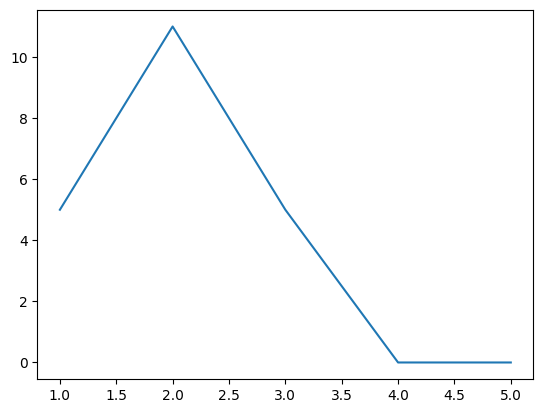

In [54]:
# F = X1 ∨ X2X3 → X4
y = np.array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
x = np.array([[0, 0, 0, 0],
              [0, 0, 0, 1],
              [0, 0, 1, 0],
              [0, 0, 1, 1],
              [0, 1, 0, 0],
              [0, 1, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 1],
              [1, 0, 1, 0],
              [1, 0, 1, 1],
              [1, 1, 0, 0],
              [1, 1, 0, 1],
              [1, 1, 1, 0],
              [1, 1, 1, 1], ])

net1 = NeuralNetworks()
net1.fit(x, y, 4)

+----+---------------------------------------------------------------+-----------------------------------+-------+
| k  |                            weights                            |                 y                 | Error |
+----+---------------------------------------------------------------+-----------------------------------+-------+
| 0  |                        [0. 0. 0. 0. 0.]                       | [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] |   5   |
| 1  |              [-0.375 -0.3   -0.225 -0.225  0.   ]             | [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] |   11  |
| 2  | [ 0.35381852 -0.05412807  0.0929839   0.0929839   0.51912411] | [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] |   5   |
| 3  | [-0.00442286 -0.34257788 -0.11973502 -0.11973502  0.51912411] | [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0] |   4   |
| 4  | [ 0.29491521 -0.26766286  0.02989171  0.02989171  0.59403913] | [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] |   5   |
| 5  | [-0.07749626 -0.56738469 -0.19259488 -0.19259488  0.59403913] | [0 1 0 1 

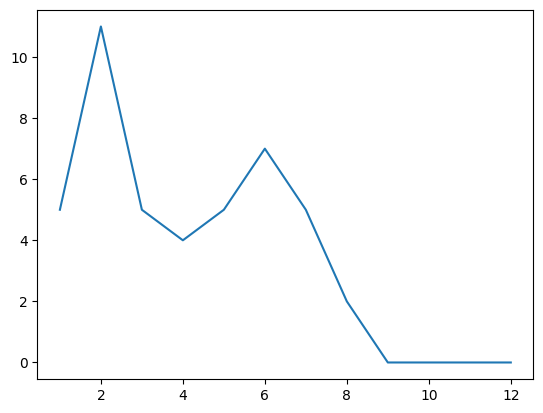

In [55]:
f = lambda x: 1. / (1 + math.exp(-1 * x))
net2 = NeuralNetworks(activation_function=f)
net2.df = lambda x: f(x) * (1 - f(x))
net2.border = 0.5
net2.fit(x, y, 11)